In [252]:
import gc
import pandas as pd
import numpy as np
train = pd.read_csv('C:/Users/VPVU2/Desktop/check/train.tsv', sep = '\t')
train.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity


In [253]:
train.count()
train_len=len(train)
print(train_len)

1482535


In [254]:
import string
import re
from nltk.corpus import stopwords
punc_replace = []
for replace in string.punctuation:
    punc_replace.append((replace, ''))

def remove_punc(text):
    return text.translate(None, string.punctuation)


emoji_pattern = re.compile('('
'\ud83c[\udf00-\udfff]|'
'\ud83d[\udc00-\ude4f\ude80-\udeff]|'
'[\u2600-\u26FF\u2700-\u27BF])+'.decode('unicode_escape'), 
re.UNICODE)

def remove_emoji(text):
    return emoji_pattern.sub('', text.decode('utf-8'))
def remove_num(num):
    num = ''.join([i for i in num if not i.isdigit()])
    return num
def to_lower(text):
    return text.lower()
stopword = set(stopwords.words('english'))
def remove_swords(text):
    text = ' '.join([i for i in text.lower().split(' ') if i not in stopword])
    return text

In [255]:
import numpy as np
train['logprice']=np.log(train['price']+1)
train.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,logprice
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet,2.397895
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...,3.970292
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...,2.397895
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...,3.583519
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity,3.806662


In [256]:
def category(category_name):
    try:
        var1, var2, var3 = category_name.split('/')
        return var1, var2, var3
    except:
        return np.nan, np.nan, np.nan

train['category1'], train['category2'],train['category3']= zip(*train['category_name'].apply(category))
category_train = train[['category1','category2','category3','logprice']]
category_train.head()

,category1,category2,category3,logprice
0,Men,Tops,T-shirts,2.397895
1,Electronics,Computers & Tablets,Components & Parts,3.970292
2,Women,Tops & Blouses,Blouse,2.397895
3,Home,Home Décor,Home Décor Accents,3.583519
4,Women,Jewelry,Necklaces,3.806662


In [257]:
def handle_missing_inplace(dataset):
    dataset['category1'].fillna(value='missing', inplace=True)
    dataset['category2'].fillna(value='missing', inplace=True)
    dataset['category3'].fillna(value='missing', inplace=True)
    dataset['brand_name'].fillna(value='missing', inplace=True)
    dataset['item_description'].fillna(value='missing', inplace=True)

In [258]:

handle_missing_inplace(train)

In [259]:
def replace_missing(df):
    
    df['brand_name'].fillna(value='None', inplace=True)
    df['item_description'].fillna(value='None', inplace=True)

In [260]:
def type_category(df):
    df['brand_name']=df['brand_name'].astype('category')

    df['item_condition_id']=df['item_condition_id'].astype('category')

In [261]:
replace_missing(train)
type_category(train)

In [262]:
# Remove Punctuation
train.item_description = train.item_description.astype(str)

train['item_description'] = train['item_description'].apply(remove_num)
train['item_description'] = train['item_description'].apply(remove_punc)
train['item_description'] = train['item_description'].apply(remove_swords)
train['item_description'] = train['item_description'].apply(to_lower)
train['item_description'] = train['item_description'].apply(remove_emoji)


In [263]:
train.name = train.name.astype(str)
train['name'] = train['name'].apply(remove_num)
train['name'] = train['name'].apply(remove_punc)
train['name'] = train['name'].apply(remove_swords)
train['name'] = train['name'].apply(to_lower)
train['name'] = train['name'].apply(remove_emoji)

In [264]:
train.category1 = train.category1.astype(str)
train['category1'] = train['category1'].apply(remove_num)
train['category1'] = train['category1'].apply(remove_punc)
train['category1'] = train['category1'].apply(remove_swords)
train['category1'] = train['category1'].apply(to_lower)
train['category1'] = train['category1'].apply(remove_emoji)

In [265]:
train.category2 = train.category2.astype(str)
train.category3 = train.category3.astype(str)
train['category2'] = train['category2'].apply(remove_num)
train['category2'] = train['category2'].apply(remove_punc)
train['category2'] = train['category2'].apply(remove_swords)
train['category2'] = train['category2'].apply(to_lower)
train['category2'] = train['category2'].apply(remove_emoji)

train['category3'] = train['category3'].apply(remove_num)
train['category3'] = train['category3'].apply(remove_punc)
train['category3'] = train['category3'].apply(remove_swords)
train['category3'] = train['category3'].apply(to_lower)
train['category3'] = train['category3'].apply(remove_emoji)
train.head(3)

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,logprice,category1,category2,category3
0,0,mlb cincinnati reds shirt size xl,3,Men/Tops/T-shirts,missing,10.0,1,description yet,2.397895,men,tops,tshirts
1,1,razer blackwidow chroma keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,keyboard great condition works like came box p...,3.970292,electronics,computers tablets,components parts
2,2,avaviv blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,adorable top hint lace key hole back pale pink...,2.397895,women,tops blouses,blouse


In [266]:

train.isnull().any()

train_id             False
name                 False
item_condition_id    False
category_name         True
brand_name           False
price                False
shipping             False
item_description     False
logprice             False
category1            False
category2            False
category3            False
dtype: bool

In [267]:
mean_log=train['logprice'].mean()

In [268]:
train['rate'] = np.where(train['logprice']<mean_log, 0, 1)

In [269]:

train=train.drop(columns=['category_name'])
train.head()

,train_id,name,item_condition_id,brand_name,price,shipping,item_description,logprice,category1,category2,category3,rate
0,0,mlb cincinnati reds shirt size xl,3,missing,10.0,1,description yet,2.397895,men,tops,tshirts,0
1,1,razer blackwidow chroma keyboard,3,Razer,52.0,0,keyboard great condition works like came box p...,3.970292,electronics,computers tablets,components parts,1
2,2,avaviv blouse,1,Target,10.0,1,adorable top hint lace key hole back pale pink...,2.397895,women,tops blouses,blouse,0
3,3,leather horse statues,1,missing,35.0,1,new tags leather horses retail rm stand foot h...,3.583519,home,home décor,home décor accents,1
4,4,k gold plated rose,1,missing,44.0,0,complete certificate authenticity,3.806662,women,jewelry,necklaces,1


# WOMAN

In [270]:
test=train.loc[train['category1'] == "women"].head(1000)

In [271]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [272]:
women_cat_nai=train.loc[train['category1'] == "women"].head(1000)
LABEL_women=women_cat_nai
LABEL_women=LABEL_women['rate']

In [273]:
cv=CountVectorizer(analyzer="word",
                            preprocessor=None,
                            stop_words="english",
                            min_df=5)
final_counts_women = cv.fit_transform((women_cat_nai['item_description']))

In [274]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
X_1, X_test, y_1, y_test = train_test_split(final_counts_women, LABEL_women, test_size=0.3, random_state=0)
NB_optimal = MultinomialNB()

# fitting the model
NB_optimal.fit(X_1, y_1)

# predict the response
pred = NB_optimal.predict(X_test)

# evaluate accuracy
acc = accuracy_score(y_test, pred) * 100
acc

55.00000000000001

In [275]:
words = np.array(cv.get_feature_names())

x = np.eye(X_test.shape[1])
probs = NB_optimal.predict_log_proba(X_test)[:, 0]
ind = np.argsort(probs)

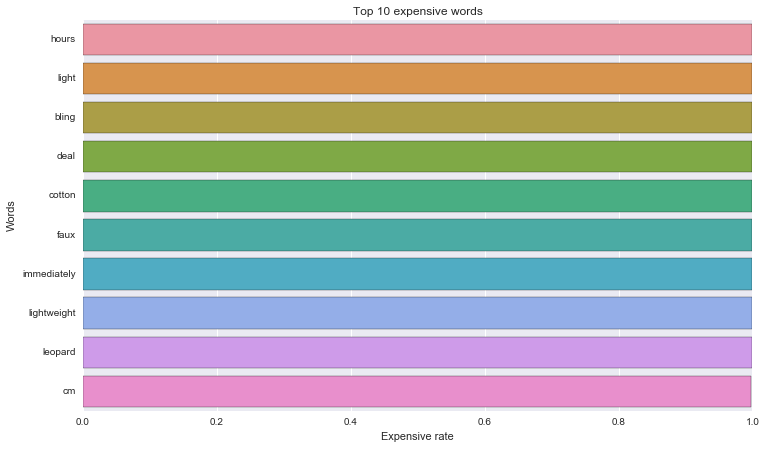

In [276]:
import matplotlib.pyplot as plt
good_words = words[ind[:10]]
bad_words = words[ind[-10:]]

good_prob = probs[ind[:10]]
bad_prob = probs[ind[-10:]]

plt.figure(figsize=(12,7))
ax = sns.barplot(y=good_words, x=(1 - np.exp(good_prob)))
plt.title('Top 10 expensive words')
plt.xlabel('Expensive rate')
plt.ylabel('Words')


In [277]:
test[test['item_description'].apply(lambda x: 'hours' in x)]

,train_id,name,item_condition_id,brand_name,price,shipping,item_description,logprice,category1,category2,category3,rate
48,48,lululemon wunder crop,3,lululemon athletica,54.0,0,perfect condition super comfy let know questio...,4.007333,women,pants,capris cropped,1
178,178,vs pink zip collared sz,1,Victoria's Secret,47.0,1,price firm ‼️ dont ask lowest price pls free ...,3.871201,women,sweaters,collared,1
481,481,blue ombré sequined homecoming dress,2,Masquerade,36.0,0,masquerade brand size perfect condition worn ...,3.610918,women,dresses,kneelength,1
674,674,kendra scott alex earrings,1,Kendra Scott,40.0,1,authentic kendra scott ️new never used ️gold p...,3.713572,women,jewelry,earrings,1
1060,1060,nwt buttery soft aztec leggings plus tc,1,missing,25.0,1,buttery soft black white gray aztec leggings ...,3.258097,women,athletic apparel,pants tights leggings,1
1205,1205,harley davidson lace shirt medium,2,Harley-Davidson,13.0,0,harley davidson lace quarter sleeve shirt nwo...,2.639057,women,tops blouses,tshirts,0
1308,1308,silver clear lens aviator,1,missing,8.0,1,note orders placed saturday mon ship tuesda...,2.197225,women,womens accessories,sunglasses,0
1500,1500,cold shoulder blouse,1,missing,16.0,1,brand new ️️️️️️️️️️️️️️️️️️ ships within hou...,2.833213,women,tops blouses,blouse,0
1637,1637,xhiliaration floral ruffle bikini top,2,Xhilaration,10.0,0,•xhilaration target bikini top floral ruffled ...,2.397895,women,swimwear,twopiece,0
1673,1673,vs pink x tshirt bundle,1,Victoria's Secret,65.0,1,price firm ‼️ dont ask lowest price pls free ...,4.189655,women,tops blouses,tshirts,1


In [278]:
test[test['item_description'].apply(lambda x: 'light' in x)]

,train_id,name,item_condition_id,brand_name,price,shipping,item_description,logprice,category1,category2,category3,rate
6,6,acacia pacific tides santorini top,3,Acacia Swimwear,64.0,0,size small straps slightly shortened fit xs be...,4.174387,women,swimwear,twopiece,1
36,36,black bag,3,missing,209.0,0,preowned light scratches hardware consistent g...,5.347108,women,womens handbags,totes shoppers,1
41,41,tropical flower print bra pink,3,PINK,13.0,1,used buh looks brand new washed ready shipped ...,2.639057,women,underwear,bras,0
143,143,lauren conrad pink polka dot blouse,3,LC Lauren Conrad,7.0,1,super cute lauren conrad light pink chiffon po...,2.079442,women,tops blouses,blouse,0
199,199,pregnancy sash,2,missing,25.0,1,maternity sash matching headband headband baby...,3.258097,women,womens accessories,belts,1
247,247,jessica simpson shoulder top small,3,Jessica Simpson,9.0,0,perfect spring light blue colored like new wom...,2.302585,women,tops blouses,blouse,0
286,286,forever pink top,3,FOREVER 21,11.0,0,worn part cat lady costume fit size stretchy ...,2.484907,women,tops blouses,blouse,0
291,291,free ship lularoe os stork leggings,1,missing,55.0,1,nwt lularoe os one size leggings purple backgr...,4.025352,women,athletic apparel,pants tights leggings,1
301,301,free shipping g freya bra,3,Freya,15.0,1,lightly lined underwire dark navy blue color p...,2.772589,women,underwear,bras,0
368,368,north face polartec fleece jacket,3,The North Face,16.0,1,light blue size medium womens light pilling pr...,2.833213,women,coats jackets,fleece jacket,0


In [279]:
test[test['item_description'].apply(lambda x: 'bling' in x)]

,train_id,name,item_condition_id,brand_name,price,shipping,item_description,logprice,category1,category2,category3,rate
152,152,nwt victoria secret bling bra,1,missing,29.0,0,nwt victoria secret bling lined demi bra,3.401197,women,underwear,bras,1
394,394,new ny giants womens bling jersey top,2,NFL,21.0,0,brand nwot nfl team apparel womens ny giants f...,3.091042,women,athletic apparel,shirts tops,1
706,706,nwt la idol jeans size,1,LA Idol,27.0,1,love jeans baby dont chance lol new tags supe...,3.332205,women,jeans,boot cut,1
836,836,vs pink bling campus crew xs,1,PINK,26.0,0,new bag pink long sleeve campus tee size xs ov...,3.295837,women,tops blouses,tshirts,1
934,934,victoria secret pink shirt bling size,3,PINK,28.0,0,victoria secret pink shirt bling size small fr...,3.367296,women,athletic apparel,shirts tops,1
1065,1065,sinful affliction womens shirt size l,3,Sinful By Affliction,24.0,0,neat unique shirtits baby hot pink skulls side...,3.218876,women,tops blouses,tshirts,1
1078,1078,large vs pink bling campus tee shirt nwt,1,PINK,42.0,1,victorias secret pink bling campus tee shirt s...,3.761200,women,tops blouses,tshirts,1
1744,1744,nwt vs pink flat legging bling,1,PINK,54.0,0,brand new tags vs pink flat legging bling legs...,4.007333,women,athletic apparel,pants tights leggings,1


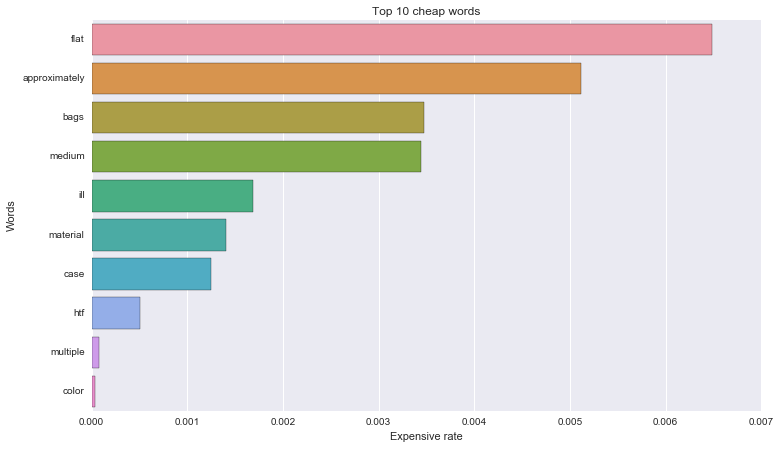

In [280]:

plt.figure(figsize=(12,7))
ax = sns.barplot(y=bad_words, x=(1 - np.exp(bad_prob)))
plt.title('Top 10 cheap words')
plt.xlabel('Expensive rate')
plt.ylabel('Words')

In [281]:
test[test['item_description'].apply(lambda x: 'htf' in x)]

,train_id,name,item_condition_id,brand_name,price,shipping,item_description,logprice,category1,category2,category3,rate
315,315,reduced lularoe os woodland creatures,1,Independent,32.0,1,new never worn tried lularoe buttery soft legg...,3.496508,women,athletic apparel,pants tights leggings,1
1372,1372,lularoe os mermaid lace euc,3,missing,32.0,1,os mermaid leggings excellent used condition h...,3.496508,women,athletic apparel,pants tights leggings,1
1603,1603,freeship new mommy floral palm set,1,missing,65.0,1,ive already lowered price set multiple times l...,4.189655,women,athletic apparel,pants tights leggings,1
1906,1906,stunning lularoe roses amelia,1,LuLaRoe,85.0,1,absolutely beautiful htf vintage roses print r...,4.454347,women,dresses,kneelength,1
2129,2129,reserved zeilei,1,missing,115.0,1,nwt htf unicorn prints os dragons tc castles o...,4.753590,women,athletic apparel,pants tights leggings,1


In [282]:
test[test['item_description'].apply(lambda x: 'multiple' in x)]

,train_id,name,item_condition_id,brand_name,price,shipping,item_description,logprice,category1,category2,category3,rate
476,476,vs pink full zip hoodie xs,3,PINK,18.0,1,vs pink full zip hoodie xs used good condition...,2.944439,women,sweaters,full zip,0
1603,1603,freeship new mommy floral palm set,1,missing,65.0,1,ive already lowered price set multiple times l...,4.189655,women,athletic apparel,pants tights leggings,1
1716,1716,nwt os lularoe disney leggings,1,LuLaRoe,27.0,0,nwt os disney lularoe leggings light bluepurpl...,3.332205,women,athletic apparel,pants tights leggings,1
1886,1886,lularoe os skeletons halloween,1,missing,25.0,1,lularoe one size brand new tags free shipping ...,3.258097,women,athletic apparel,pants tights leggings,1
2035,2035,large pearl choker necklace,1,Customized & Personalized,5.0,1,large pearl brown cord necklace multiple lengt...,1.791759,women,jewelry,necklaces,0


In [283]:
test[test['item_description'].apply(lambda x: 'color' in x)]

,train_id,name,item_condition_id,brand_name,price,shipping,item_description,logprice,category1,category2,category3,rate
47,47,brandy melville shoulder crop top,2,Brandy Melville,21.0,0,brandy melville shoulder crop top one size fit...,3.091042,women,tops blouses,blouse,1
50,50,michael kors crossbody,2,Michael Kors,114.0,0,sz large color black like new authentic,4.744932,women,womens handbags,messenger crossbody,1
53,53,pink victorias secret lace bandeau,2,PINK,7.0,0,victorias secret pink whitecream colored lace ...,2.079442,women,underwear,bras,0
61,61,nwt lularoe os french bulldog leggings,1,missing,50.0,1,brand new tag bag french bulldog leggings hard...,3.931826,women,athletic apparel,pants tights leggings,1
99,99,size watercolor inspire crop,3,Lululemon,44.0,0,watercolor inspire crop pilling stickiness wha...,3.806662,women,athletic apparel,pants tights leggings,1
107,107,boots nwt,1,Merona,13.0,1,merona short boot new tag size come ankle tau...,2.639057,women,shoes,boots,0
130,130,double layer studio microphone mic,1,missing,8.0,1,use microphone pop filter immediately improve ...,2.197225,women,jewelry,necklaces,0
173,173,rue long cardigan,2,rue,9.0,0,worn times long lace like material comfortabl...,2.302585,women,sweaters,cardigan,0
186,186,new g guess shoes,1,GUESS,31.0,0,natural color size,3.465736,women,shoes,sandals,1
192,192,cherokee purple xxsp scrub pants,3,Cherokee,10.0,1,minor stains top bottoms top xxs bottoms xxs ...,2.397895,women,pants,casual pants,0


# KIDS

In [284]:
kids_cat_nai=train.loc[train['category1'] == "kids"].head(1000)
LABEL_kids =kids_cat_nai
LABEL_kids =LABEL_kids['rate']
test=train.loc[train['category1'] == "kids"].head(1000)

In [285]:
test

,train_id,name,item_condition_id,brand_name,price,shipping,item_description,logprice,category1,category2,category3,rate
17,17,new baby ktan active baby carrier,1,missing,29.0,1,brand new box size medium color coral retails ...,3.401197,kids,gear,backpacks carriers,1
34,34,four puppy dog stuffed animal ty,3,missing,5.0,1,beanie babies pugsley wrinkles puppy pumpkin ...,1.791759,kids,toys,stuffed animals plush,0
46,46,metallic purple slime sparkles,1,missing,8.0,0,slime approximately ounces soft kind sticky i...,2.197225,kids,toys,arts crafts,0
51,51,led kids shoes size size,1,missing,36.0,0,led shoes kids seven colors one shoes red blue...,3.610918,kids,girls,shoes,1
57,57,infantino baby carrier,3,Infantino,7.0,1,great condition stains tears super easy use i...,2.079442,kids,gear,backpacks carriers,0
58,58,new yokai watch backpack,1,missing,10.0,0,new,2.397895,kids,gear,backpacks carriers,0
65,65,new holiday barbie,1,Barbie,13.0,0,brand new,2.639057,kids,toys,dolls accessories,0
73,73,toddler vineyard vines hat,3,missing,14.0,0,probably best year old,2.708050,kids,boys mos,accessories,0
75,75,littlest pet shop accessories bon,3,Littlest Pet Shop,12.0,1,hold buy,2.564949,kids,toys,dolls accessories,0
79,79,sea wees size,3,Sea Wees,14.0,0,great condition sea wees size brown,2.708050,kids,girls mos,shoes,0


In [286]:
kids_cat_nai

,train_id,name,item_condition_id,brand_name,price,shipping,item_description,logprice,category1,category2,category3,rate
17,17,new baby ktan active baby carrier,1,missing,29.0,1,brand new box size medium color coral retails ...,3.401197,kids,gear,backpacks carriers,1
34,34,four puppy dog stuffed animal ty,3,missing,5.0,1,beanie babies pugsley wrinkles puppy pumpkin ...,1.791759,kids,toys,stuffed animals plush,0
46,46,metallic purple slime sparkles,1,missing,8.0,0,slime approximately ounces soft kind sticky i...,2.197225,kids,toys,arts crafts,0
51,51,led kids shoes size size,1,missing,36.0,0,led shoes kids seven colors one shoes red blue...,3.610918,kids,girls,shoes,1
57,57,infantino baby carrier,3,Infantino,7.0,1,great condition stains tears super easy use i...,2.079442,kids,gear,backpacks carriers,0
58,58,new yokai watch backpack,1,missing,10.0,0,new,2.397895,kids,gear,backpacks carriers,0
65,65,new holiday barbie,1,Barbie,13.0,0,brand new,2.639057,kids,toys,dolls accessories,0
73,73,toddler vineyard vines hat,3,missing,14.0,0,probably best year old,2.708050,kids,boys mos,accessories,0
75,75,littlest pet shop accessories bon,3,Littlest Pet Shop,12.0,1,hold buy,2.564949,kids,toys,dolls accessories,0
79,79,sea wees size,3,Sea Wees,14.0,0,great condition sea wees size brown,2.708050,kids,girls mos,shoes,0


In [287]:
train['category1'].value_counts()

women                    664385
beauty                   207828
kids                     171689
electronics              119631
men                       93363
home                      67871
vintage  collectibles     46530
                          45351
handmade                  30840
sports  outdoors          24331
missing                   10716
Name: category1, dtype: int64

In [288]:
cv=CountVectorizer(analyzer="word",
                            preprocessor=None,
                            stop_words="english",
                            min_df=5)
final_counts_kids = cv.fit_transform((kids_cat_nai['item_description']))

In [289]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
X_1, X_test, y_1, y_test = train_test_split(final_counts_kids, LABEL_kids, test_size=0.3, random_state=0)
NB_optimal = MultinomialNB()

# fitting the model
NB_optimal.fit(X_1, y_1)

# predict the response
pred = NB_optimal.predict(X_test)

# evaluate accuracy
acc = accuracy_score(y_test, pred) * 100
acc

63.0

In [290]:
words = np.array(cv.get_feature_names())

x = np.eye(X_test.shape[1])
probs = NB_optimal.predict_log_proba(X_test)[:, 0]
ind = np.argsort(probs)

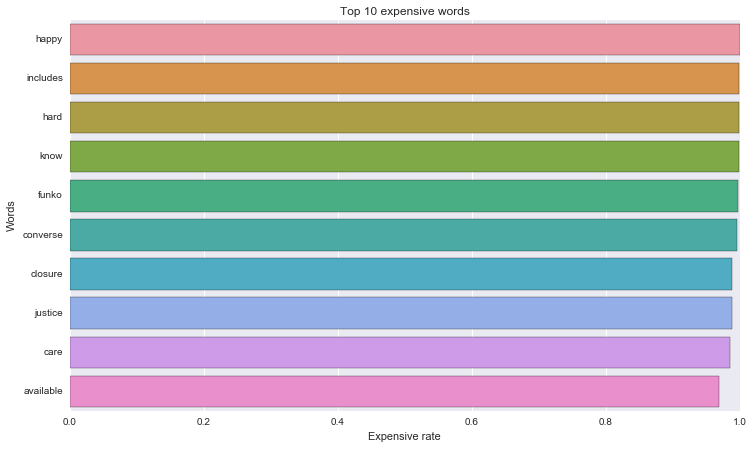

In [291]:

good_words = words[ind[:10]]
bad_words = words[ind[-10:]]

good_prob = probs[ind[:10]]
bad_prob = probs[ind[-10:]]

plt.figure(figsize=(12,7))
ax = sns.barplot(y=good_words, x=(1 - np.exp(good_prob)))
plt.title('Top 10 expensive words')
plt.xlabel('Expensive rate')
plt.ylabel('Words')

In [292]:
test[test['item_description'].apply(lambda x: 'happy' in x)]

,train_id,name,item_condition_id,brand_name,price,shipping,item_description,logprice,category1,category2,category3,rate
751,751,st birthday boy party bundle,1,missing,16.0,0,st birthday boy party bundle including pieces...,2.833213,kids,toys,party supplies,0
958,958,lot puma nike athletic shorts,3,Nike,10.0,0,free shipping happy bundle save shipping nike ...,2.397895,kids,boys tt,bottoms,0
4410,4410,mam self sterilizing bottles,2,MAM Baby,14.0,0,total never used im happy combine shipping,2.708050,kids,feeding,pacifiers accessories,0
4412,4412,ralph lauren polo nb stripe blue sleeper,2,Ralph Lauren,9.0,1,perfect condition boy born lb fit us short tim...,2.302585,kids,boys mos,onepieces,0
5377,5377,size fila sneakers,3,missing,11.0,0,bright light weight size girls fila sneakers ...,2.484907,kids,girls tt,shoes,0
5392,5392,leap frog magnetic animal set,3,Leap Frog,16.0,1,barnyard sounds work horse duck wear marks pla...,2.833213,kids,toys,learning education,0
6396,6396,paw patrol pink hb banner,1,missing,16.0,0,celebrate littles birthday happy birthday bann...,2.833213,kids,toys,party supplies,0


In [293]:
test[test['item_description'].apply(lambda x: 'includes' in x)]

,train_id,name,item_condition_id,brand_name,price,shipping,item_description,logprice,category1,category2,category3,rate
771,771,koala baby month baby boy outfit,2,missing,8.0,1,adorable dressy baby boy holiday outfit koala ...,2.197225,kids,boys mos,tops tshirts,0
1565,1565,halloween police costumedress,3,Creativity for Kids,16.0,0,vest fits set includes vest glasses badges wh...,2.833213,kids,toys,dress pretend play,0
1725,1725,girl mystery bundle,2,missing,9.0,0,includes items mystery could include dolls ma...,2.302585,kids,toys,dolls accessories,0
1728,1728,learning journey international,1,missing,11.0,0,dr toys spelling match self correcting puzzle...,2.484907,kids,toys,learning education,0
1735,1735,playtex diaper genie elite,2,Playtex,21.0,0,includes one pack diaper refills patented doub...,3.091042,kids,diapering,diaper pails refills,1
1905,1905,loving family family manor dollhouse,1,Fisher-Price,44.0,0,brand new fisherprice family family manor doll...,3.806662,kids,toys,dolls accessories,1
2208,2208,spice girls dolls total boxes,2,missing,35.0,1,six spice girls dolls original boxes includes ...,3.583519,kids,toys,dolls accessories,1
2346,2346,turtles mega bloks bundle,1,Mega Bloks,24.0,0,includes ralphmikey leo items new unused come ...,3.218876,kids,toys,building toys,1
2769,2769,haley jahmari carters listing,3,Old Navy,21.0,0,girls jean bundle includes total pair size ...,3.091042,kids,girls,jeans,1
2830,2830,size kids shoes,3,missing,10.0,0,worn still life left includes tennys boots sli...,2.397895,kids,boys tt,shoes,0


In [294]:
test[test['item_description'].apply(lambda x: 'hard' in x)]

,train_id,name,item_condition_id,brand_name,price,shipping,item_description,logprice,category1,category2,category3,rate
287,287,set dragon balls,2,Funimation Production,12.0,1,set dragon balls made hard plastic great room ...,2.564949,kids,toys,action figures statues,0
526,526,ballerina doll,1,American Boy & Girl,15.0,0,cute blonde ballerina doll hardly used cute im...,2.772589,kids,toys,dolls accessories,0
1531,1531,lot,2,missing,12.0,1,specific buyer orchard rabbit rabbit pristine...,2.564949,kids,toys,dolls accessories,0
1689,1689,sprayground lil money mini bookbag new,1,Nickelodeon,50.0,1,kid exterior dimensions x x front zipper po...,3.931826,kids,gear,backpacks carriers,1
2147,2147,lularoe matching sister animal leggings,1,missing,70.0,1,brand new tags kids sm lxl woodland leggings p...,4.262680,kids,girls tt,bottoms,1
2542,2542,big baby girl giggling doll,3,missing,26.0,0,baby girl doll dressed redwhite navy blue stri...,3.295837,kids,toys,dolls accessories,1
3322,3322,jujube quick,4,missing,16.0,1,used great condition wear hardware,2.833213,kids,diapering,diaper bags,0
3721,3721,frozen dress shoes,3,Disney,10.0,1,size toddler shoes good condition couple smal...,2.397895,kids,girls tt,shoes,0
3843,3843,funko pop chase punisher limited edition,1,Funko,30.0,1,great condition crease back one side hard see ...,3.433987,kids,toys,action figures statues,1
4728,4728,toddler hunter boots socks,3,missing,46.0,0,pink hunter boots equivalent like size toddler...,3.850148,kids,girls tt,shoes,1


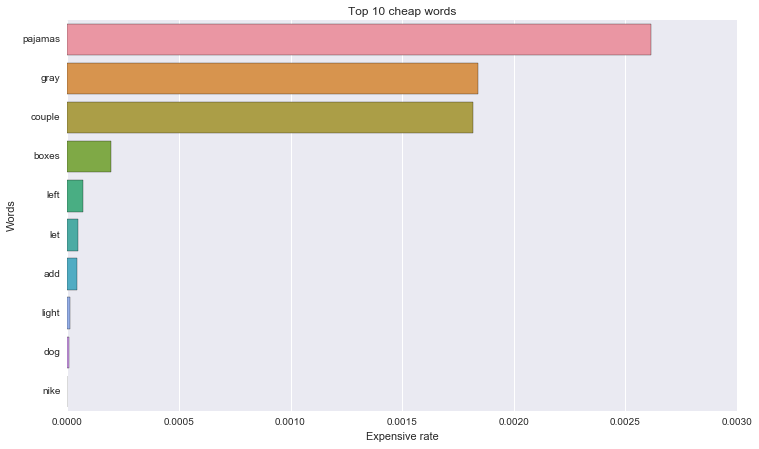

In [295]:

plt.figure(figsize=(12,7))
ax = sns.barplot(y=bad_words, x=(1 - np.exp(bad_prob)))
plt.title('Top 10 cheap words')
plt.xlabel('Expensive rate')
plt.ylabel('Words')

In [296]:
test[test['item_description'].apply(lambda x: 'light' in x)]

,train_id,name,item_condition_id,brand_name,price,shipping,item_description,logprice,category1,category2,category3,rate
51,51,led kids shoes size size,1,missing,36.0,0,led shoes kids seven colors one shoes red blue...,3.610918,kids,girls,shoes,1
89,89,nike boy sneakers,3,Nike,28.0,0,size high tops super light good condition worn...,3.367296,kids,boys,shoes,1
138,138,breal girls boutique dress w adjstraps,2,missing,7.0,0,designer breal details little girls lightweigh...,2.079442,kids,girls,dresses,0
477,477,vintage cyber pup jr dog walks,3,missing,12.0,0,sale extremely rare highly sought cyber pup jr...,2.564949,kids,toys,electronics kids,0
1240,1240,patagonia sweater jacket,3,missing,30.0,1,lightweight jacket emeraldkelly green vgu cond...,3.433987,kids,boys tt,coats jackets,1
1346,1346,fidget spinners clear led rmeach,1,A Plus Child Supply,8.0,1,fidget spinners clear led spinners different ...,2.197225,kids,toys,games,0
1396,1396,ugg pink bailey button infant sz,3,UGG Australia,51.0,0,free shipping gladly combine save shipping cos...,3.951244,kids,girls tt,shoes,1
1867,1867,adidas sandals,4,missing,14.0,0,adidas zeitfrei k sandals size kids swim slid...,2.708050,kids,boys tt,shoes,0
1942,1942,fisher price vintage microscope set toy,4,Fisher-Price,9.0,0,working condition missing battery cover light ...,2.302585,kids,toys,learning education,0
1957,1957,blueberry cream slime,3,missing,3.0,1,blueberry cream slime fun squeeze nice light b...,1.386294,kids,toys,arts crafts,0


In [297]:
test[test['item_description'].apply(lambda x: 'dog' in x)]

,train_id,name,item_condition_id,brand_name,price,shipping,item_description,logprice,category1,category2,category3,rate
34,34,four puppy dog stuffed animal ty,3,missing,5.0,1,beanie babies pugsley wrinkles puppy pumpkin ...,1.791759,kids,toys,stuffed animals plush,0
234,234,hello kitty orizuru geisha kimono plush,1,Hello Kitty,56.0,1,•bnwt bnip hello kitty hk orizuru geisha kimon...,4.043051,kids,toys,stuffed animals plush,1
477,477,vintage cyber pup jr dog walks,3,missing,12.0,0,sale extremely rare highly sought cyber pup jr...,2.564949,kids,toys,electronics kids,0
1722,1722,nwot gap dress purple white,2,missing,11.0,1,super cute would look great boots stockings wi...,2.484907,kids,girls tt,dresses,0
5392,5392,leap frog magnetic animal set,3,Leap Frog,16.0,1,barnyard sounds work horse duck wear marks pla...,2.833213,kids,toys,learning education,0
6302,6302,rene rofe snowflake fair isle sleeper,1,missing,14.0,0,pinkpandapotamus rene rofe baby snowflake slee...,2.708050,kids,boys mos,onepieces,0
7950,7950,secret life pets ty plush dogs,3,missing,7.0,1,two ty branded dogs listing movie universal pi...,2.079442,kids,toys,stuffed animals plush,0
8514,8514,vs pink dogs,2,missing,9.0,0,victoria secrets dogs,2.302585,kids,toys,stuffed animals plush,0


In [298]:
test[test['item_description'].apply(lambda x: 'nike' in x)]

,train_id,name,item_condition_id,brand_name,price,shipping,item_description,logprice,category1,category2,category3,rate
407,407,authentic blue black nike foams c,3,Nike,56.0,0,authentic blue black nike foams size c good co...,4.043051,kids,boys mos,shoes,1
559,559,nike shox size c,3,Nike,12.0,0,girls nike shox size c eeuc noticeable flaws,2.564949,kids,girls mos,shoes,0
608,608,new pairs nike long socks girls cc,1,Nike,8.0,1,new tags pairs nike long socks girls cc pink ...,2.197225,kids,girls tt,accessories,0
781,781,black nike size c,3,Nike,18.0,0,black nike acg boots size c great condition pr...,2.944439,kids,boys tt,shoes,0
958,958,lot puma nike athletic shorts,3,Nike,10.0,0,free shipping happy bundle save shipping nike ...,2.397895,kids,boys tt,bottoms,0
1212,1212,new nike top girls dri fi,1,Nike,12.0,1,new tags nike dri fit top girls teal neon reta...,2.564949,kids,girls tt,tops tshirts,0
1214,1214,medium boys nike ua boxer briefs,3,Nike,18.0,1,medium boys nike pro combat padded boxer brief...,2.944439,kids,boys,bottoms,0
1679,1679,boys nike pants,3,Nike,18.0,1,boys therma fit nike pants great condition siz...,2.944439,kids,boys,bottoms,0
1875,1875,vintage tommy hilfiger overalls,2,Tommy Hilfiger,21.0,0,super dope size toddler tommy jeans overalls g...,3.091042,kids,boys tt,bottoms,1
2225,2225,nike toddler size,3,Nike,26.0,0,nike toddler size good condition,3.295837,kids,girls tt,shoes,1


# BEAUTY

In [299]:
beauty_cat_nai=train.loc[train['category1'] == "beauty"].head(1000)
LABEL_beauty=beauty_cat_nai
LABEL_beauty=LABEL_beauty['rate']
test=train.loc[train['category1'] == "beauty"].head(1000)
cv=CountVectorizer(analyzer="word",
                            preprocessor=None,
                            stop_words="english",
                            min_df=5)
final_counts_beauty = cv.fit_transform((beauty_cat_nai['item_description']))
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
X_1, X_test, y_1, y_test = train_test_split(final_counts_beauty, LABEL_beauty, test_size=0.3, random_state=0)
NB_optimal = MultinomialNB()

# fitting the model
NB_optimal.fit(X_1, y_1)

# predict the response
pred = NB_optimal.predict(X_test)

# evaluate accuracy
acc = accuracy_score(y_test, pred) * 100
acc

64.66666666666666

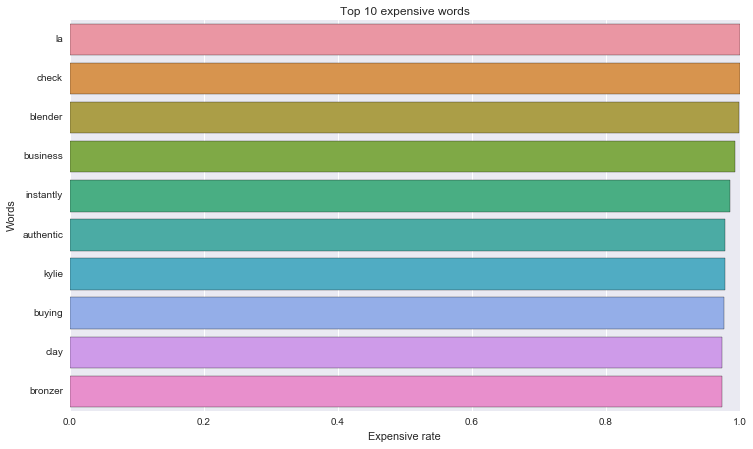

In [300]:
words = np.array(cv.get_feature_names())

x = np.eye(X_test.shape[1])
probs = NB_optimal.predict_log_proba(X_test)[:, 0]
ind = np.argsort(probs)
good_words = words[ind[:10]]
bad_words = words[ind[-10:]]

good_prob = probs[ind[:10]]
bad_prob = probs[ind[-10:]]

plt.figure(figsize=(12,7))
ax = sns.barplot(y=good_words, x=(1 - np.exp(good_prob)))
plt.title('Top 10 expensive words')
plt.xlabel('Expensive rate')
plt.ylabel('Words')

In [301]:
test[test['item_description'].apply(lambda x: 'la' in x)]

,train_id,name,item_condition_id,brand_name,price,shipping,item_description,logprice,category1,category2,category3,rate
15,15,sephora tarte birthday gift,1,Tarte,11.0,1,brand new deluxe travel size products contains...,2.484907,beauty,makeup,makeup sets,0
49,49,younique fiber lash mascara,1,missing,9.0,1,younique fiber lash mascara quickly become fav...,2.302585,beauty,makeup,eyes,0
96,96,luminess air airbrush makeup system,1,missing,81.0,1,bought groupon charged sent wont return one ...,4.406719,beauty,makeup,face,1
112,112,huda beauty lashes,1,Sephora,12.0,0,huda beauty lashes samantha,2.564949,beauty,makeup,eyes,0
187,187,moodstruck fiber lashes mascara,1,Younique,14.0,1,moodstruck fiber lash increase average lash v...,2.708050,beauty,makeup,eyes,0
219,219,glamglow youthcleanse,1,Estee Lauder,22.0,0,new hollywood california glamglow youthcleanse...,3.135494,beauty,skin care,face,1
257,257,fs lip smacker shine,1,Bonne Bell,6.0,1,new flavors,1.945910,beauty,makeup,lips,0
265,265,new ulta makeup lot,1,Ulta,14.0,0,never used palette lip crayon lip gloss du...,2.708050,beauty,makeup,makeup sets,0
299,299,free ship glamglow glow moisturizer,1,Sephora,7.0,1,selling brand new mini oz glamglow glow start...,2.079442,beauty,skin care,face,0
318,318,makeup bundle,1,missing,23.0,0,brandnew makeup save dollars bundle buying ev...,3.178054,beauty,makeup,makeup sets,1


In [302]:
test[test['item_description'].apply(lambda x: 'check' in x)]

,train_id,name,item_condition_id,brand_name,price,shipping,item_description,logprice,category1,category2,category3,rate
196,196,free ship colourpop trap,1,missing,10.0,1,ultra matte lip brand new box ships days bun...,2.397895,beauty,makeup,lips,0
319,319,nyx suede sandstorm liquid lippy,1,NYX,9.0,1,choose rm please read bio buying closetthanks...,2.302585,beauty,makeup,lips,0
488,488,la girl banana yellow setting powder,1,missing,8.0,1,la girl hd pro setting powder banana yellow b...,2.197225,beauty,makeup,face,0
507,507,mink false eyelashes w glue,1,missing,12.0,1,bnib reusable pairs includes new duo clear ...,2.564949,beauty,makeup,eyes,0
589,589,honey spice ▪️new fall scent,1,missing,3.0,1,try new fall scent pink zebra sprinkles soft s...,1.386294,beauty,fragrance,candles home scents,0
827,827,born way natural beige,1,Too Faced,32.0,0,brand new unopened box never used swatched aut...,3.496508,beauty,makeup,face,1
1006,1006,tartelette amazonian clay matte,1,Tarte,34.0,0,store closing soon final price if listed avai...,3.555348,beauty,makeup,makeup palettes,1
1071,1071,ryk mink eyelashes fur lashes,1,missing,22.0,1,long flair mink lashes size quarter lash add...,3.135494,beauty,makeup,eyes,1
1741,1741,estee lauder double wear powder makeup,1,Estee Lauder,16.0,0,double wear powder makeup shade cool bone tes...,2.833213,beauty,makeup,face,0
2053,2053,hold nikki lush kitchen shower jelly,1,missing,45.0,0,reserved listing get calacas shower jelly tw...,3.828641,beauty,bath body,bath,1


In [303]:
test[test['item_description'].apply(lambda x: 'blender' in x)]

,train_id,name,item_condition_id,brand_name,price,shipping,item_description,logprice,category1,category2,category3,rate
163,163,fantastic four set,1,beautyblender®,20.0,1,brand new never used fantastic four set includ...,3.044522,beauty,tools accessories,makeup brushes tools,1
1314,1314,beauty bundle,1,missing,41.0,0,bundle include abh dipbrow pomade chocolate l...,3.737670,beauty,makeup,makeup sets,1
2287,2287,pcs matte lipglosses bundle mettalic,1,missing,24.0,0,read discription purchasing ️item described ti...,3.218876,beauty,makeup,lips,1
2443,2443,clear silicone blender,1,missing,4.0,1,rm rm bnip silicone blender clear oblong shap...,1.609438,beauty,makeup,brushes applicators,0
3270,3270,unicorn design brushes piece,1,missing,20.0,1,unicorn design brushes piece super cute hand...,3.044522,beauty,makeup,brushes applicators,1
3655,3655,freeship latexfree small shaped sponge,1,missing,4.0,1,‼️latexfree‼️ small shaped makeup foundation s...,1.609438,beauty,makeup,brushes applicators,0
3922,3922,hold jennifer lynn,3,Clinique,61.0,0,clinique face soap new estée lauder resilient ...,4.127134,beauty,makeup,face,1
4182,4182,floresshop,1,missing,11.0,1,bnip silicone blender blue oblong shaped use ...,2.484907,beauty,makeup,brushes applicators,0
4777,4777,beauty blender fantastic four kit nwt,1,Sephora,26.0,1,free shipping price firm no holds nwt fantasti...,3.295837,beauty,makeup,brushes applicators,1
5995,5995,silicone sponge makeup,1,missing,7.0,1,savings make price beats competition highest ...,2.079442,beauty,tools accessories,makeup brushes tools,0


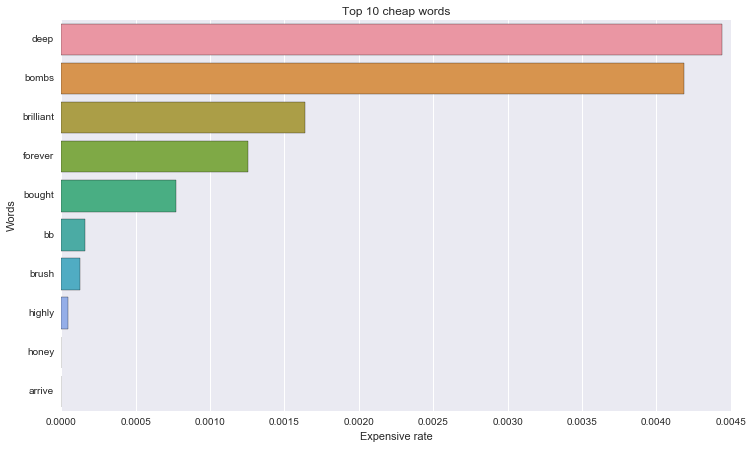

In [304]:
plt.figure(figsize=(12,7))
ax = sns.barplot(y=bad_words, x=(1 - np.exp(bad_prob)))
plt.title('Top 10 cheap words')
plt.xlabel('Expensive rate')
plt.ylabel('Words')

In [305]:
test[test['item_description'].apply(lambda x: 'highly' in x)]

,train_id,name,item_condition_id,brand_name,price,shipping,item_description,logprice,category1,category2,category3,rate
319,319,nyx suede sandstorm liquid lippy,1,NYX,9.0,1,choose rm please read bio buying closetthanks...,2.302585,beauty,makeup,lips,0
511,511,anastasia beverly hills glow,1,missing,15.0,1,sale brand new anastasia beverly hills glow ki...,2.772589,beauty,makeup,makeup palettes,0
589,589,honey spice ▪️new fall scent,1,missing,3.0,1,try new fall scent pink zebra sprinkles soft s...,1.386294,beauty,fragrance,candles home scents,0
1504,1504,pink zebra sprinkles•fall delights,1,missing,10.0,1,personalize home fragrance pink zebra signatur...,2.397895,beauty,fragrance,candles home scents,0
2368,2368,nubian ii eye shadow palette,1,missing,20.0,1,brand new nubian ii eye shadow palettethis col...,3.044522,beauty,makeup,makeup palettes,1
3218,3218,tartelette bloom palette,1,Tarte,40.0,0,brand new never opened authentic shade neutr...,3.713572,beauty,makeup,makeup palettes,1
3249,3249,pink zebra soy wax melts clean,1,missing,5.0,1,try scents pink zebra sprinkles soft soy wax ...,1.791759,beauty,fragrance,candles home scents,0
3882,3882,nib smashbox eyeshadow trio,1,Smashbox,22.0,0,authentic smashbox cosmetics photo op eye shad...,3.135494,beauty,makeup,eyes,1
4954,4954,estée lauder primerbrush duo,1,Estee Lauder,16.0,1,great estée lauder duo brand new never opened ...,2.833213,beauty,skin care,face,0
5576,5576,faced sweet peach gloss papa peach,1,Too Faced,22.0,1,brand new box full size brand new release face...,3.135494,beauty,makeup,lips,1


In [306]:
test[test['item_description'].apply(lambda x: 'honey' in x)]

,train_id,name,item_condition_id,brand_name,price,shipping,item_description,logprice,category1,category2,category3,rate
56,56,new josie maran divine drip,1,Sephora,14.0,0,new pure honey oz,2.708050,beauty,skin care,face,0
473,473,hold engravemybones,1,NYX,23.0,1,items nyx nyx lingerie lipstick honeymoon ny...,3.178054,beauty,makeup,lips,1
847,847,digital hairstraightener brushfreeglove,1,missing,35.0,1,electric hair straightener brush best beauty s...,3.583519,beauty,hair care,styling products,1
1278,1278,matte foundation,3,No7 Make-up,8.0,1,love goes color shade honey ive used times,2.197225,beauty,makeup,face,0
1511,1511,boxes freshlooks choose colors,1,missing,29.0,0,freshlooks colored contact lenses boxessterli...,3.401197,beauty,makeup,eyes,1
3180,3180,tarte foundation,1,Tarte,25.0,1,new sealed tan honey oz,3.258097,beauty,makeup,face,1
3302,3302,tarte sea foundation,1,Tarte,26.0,1,new box never used shade light honey expiratio...,3.295837,beauty,makeup,face,1
3448,3448,makeup atelier eyeshadow palette,1,Sephora,19.0,0,new box honey brown four warm brown shades cha...,2.995732,beauty,makeup,makeup palettes,1
3709,3709,jo malone,2,missing,116.0,0,jo malone peony blush suede nectarine blossom ...,4.762174,beauty,fragrance,women,1
4502,4502,tarte amazonian clay foundation shade,1,missing,30.0,1,fair light honey new used full sized sealed re...,3.433987,beauty,makeup,face,1


In [307]:
test[test['item_description'].apply(lambda x: 'arrive' in x)]

,train_id,name,item_condition_id,brand_name,price,shipping,item_description,logprice,category1,category2,category3,rate
1800,1800,lush kitchen bath bomb bundle,1,missing,37.0,0,bundle three lush bath bombs still original lu...,3.637586,beauty,bath body,bath,1
2577,2577,liquid lipstick set christmas,1,missing,20.0,1,free shipping brand new clearance dont purch...,3.044522,beauty,makeup,lips,1
3460,3460,eyelashes bundle,1,missing,8.0,1,lashes area made high quality fibers easy put ...,2.197225,beauty,makeup,eyes,0
3565,3565,discount fashion eyeshadow,1,missing,21.0,1,dont purchases reading following details prod...,3.091042,beauty,makeup,makeup palettes,1
4621,4621,mac selena eye liner sold,1,missing,30.0,0,listing eyeliner limited edition mac cosmetics...,3.433987,beauty,makeup,eyes,1
4872,4872,kylie jenner birthday edition mini av,1,missing,21.0,1,kylie jenner birthday edition mini lip stick s...,3.091042,beauty,makeup,lips,1
6022,6022,halloween special,1,missing,5.0,1,black danimer ⭐ brand new long lasting matt...,1.791759,beauty,makeup,lips,0
6311,6311,women cosmetic palette makeup tool,1,missing,24.0,1,free shipping brand new large inventory part...,3.218876,beauty,makeup,face,1
6369,6369,instock huda beauty palette make ai,1,missing,20.0,1,free shipfast deliverybrand new new colors hu...,3.044522,beauty,makeup,eyes,1
6456,6456,charistmas gift kylie koko lipstick ex,1,missing,20.0,1,free ship fast delivery brand new kylie koko...,3.044522,beauty,makeup,lips,1


# ELECTRONIC

In [308]:
elec_cat_nai=train.loc[train['category1'] == "electronics"].head(1000)
LABEL_elec=elec_cat_nai
LABEL_elec=LABEL_elec['rate']
test=train.loc[train['category1'] == "electronics"].head(1000)
cv=CountVectorizer(analyzer="word",
                            preprocessor=None,
                            stop_words="english",
                            min_df=5)

final_counts_elec = cv.fit_transform((elec_cat_nai['item_description']))
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
X_1, X_test, y_1, y_test = train_test_split(final_counts_elec, LABEL_elec, test_size=0.3, random_state=0)
NB_optimal = MultinomialNB()

# fitting the model
NB_optimal.fit(X_1, y_1)

# predict the response
pred = NB_optimal.predict(X_test)

# evaluate accuracy
acc = accuracy_score(y_test, pred) * 100
acc


69.33333333333334

In [309]:
z = cv.transform(['gold', 'chargers','flat'])
NB_optimal.predict_proba(z)


array([[0.51462648, 0.48537352],
       [0.88417798, 0.11582202],
       [0.62913932, 0.37086068]])

In [310]:
elec_cat_nai["rate"].value_counts()

0    575
1    425
Name: rate, dtype: int64

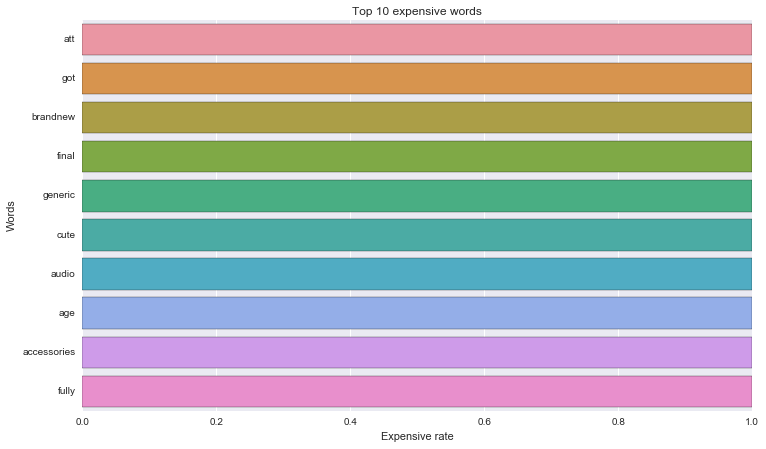

In [311]:
words = np.array(cv.get_feature_names())

x = np.eye(X_test.shape[1])
probs = NB_optimal.predict_log_proba(X_test)[:, 0]
ind = np.argsort(probs)
good_words = words[ind[:10]]
bad_words = words[ind[-10:]]

good_prob = probs[ind[:10]]
bad_prob = probs[ind[-10:]]

plt.figure(figsize=(12,7))
ax = sns.barplot(y=good_words, x=(1 - np.exp(good_prob)))
plt.title('Top 10 expensive words')
plt.xlabel('Expensive rate')
plt.ylabel('Words')

In [312]:
good_prob

array([-34.98239605, -23.39530448, -21.18111826, -20.08369191,
       -19.91527674, -17.99121447, -17.80809277, -17.51752372,
       -16.38148791, -16.32431847])

In [313]:
test[test['item_description'].apply(lambda x: 'att' in x)]

,train_id,name,item_condition_id,brand_name,price,shipping,item_description,logprice,category1,category2,category3,rate
179,179,iphone flexible phone case,1,missing,4.0,1,apple iphone clear shockproof full body tpu ...,1.609438,electronics,cell phones accessories,cases covers skins,0
320,320,professional precision digital scale,1,missing,12.0,0,rt professional digital mini scale precision i...,2.564949,electronics,cell phones accessories,cell phones smartphones,0
974,974,lumee iphone plus,1,missing,18.0,1,dimmer switch control light output let control...,2.944439,electronics,cell phones accessories,cases covers skins,0
1015,1015,xbox complete package,3,Xbox,59.0,0,xbox elite gb includes power adapter headset...,4.094345,electronics,video games consoles,consoles,1
1138,1138,samsung galaxy otterbox,3,Samsung,16.0,0,pink white samsung galaxy otter box basically ...,2.833213,electronics,cell phones accessories,cases covers skins,0
1141,1141,gba sp boktai,3,Nintendo,60.0,1,missing instruction booklet boktai box gba pa...,4.110874,electronics,video games consoles,games,1
1519,1519,ijust full kit mah batteryjuice,1,missing,35.0,1,ml juice included mah battery included pickyou...,3.583519,electronics,tv audio surveillance,gadgets,1
1568,1568,nike iphone rubber case,1,missing,16.0,0,price firm dont accept offer dont ask lower ...,2.833213,electronics,cell phones accessories,cell phones smartphones,0
1597,1597,ipod touch th generation,4,Apple,31.0,0,could use new battery,3.465736,electronics,cell phones accessories,cell phones smartphones,1
1617,1617,toshiba satellite laptop,3,Toshiba,75.0,1,toshiba satellite laptop harman kardon battery...,4.330733,electronics,computers tablets,laptops netbooks,1


In [314]:
test[test['item_description'].apply(lambda x: 'got' in x)]

,train_id,name,item_condition_id,brand_name,price,shipping,item_description,logprice,category1,category2,category3,rate
228,228,amazon fire stick,1,AmazonBasics,51.0,0,got amazon fire stick unfortunately connect wi...,3.951244,electronics,tv audio surveillance,gadgets,1
233,233,rockstar bundle xbox one,1,Xbox,38.0,1,brand new factory sealed fast free shipping p...,3.663562,electronics,video games consoles,games,1
502,502,new box belkin iphoneipad chargers,1,Belkin,15.0,1,bell stores got salvage auction box damaged s...,2.772589,electronics,cell phones accessories,cell phone accessories,0
799,799,freeship lg tones pro pink,1,LG,25.0,1,tried didnt like fit forgot return loss gain a...,3.258097,electronics,cell phones accessories,headsets,1
953,953,lcd monitor asus full hd,2,ASUS,89.0,0,model vs got gift friend opened used times e...,4.499810,electronics,computers tablets,desktops allinones,1
1022,1022,galaxy note gb read description,4,Samsung,115.0,1,color black description gb galaxy note los...,4.753590,electronics,cell phones accessories,cell phones smartphones,1
1138,1138,samsung galaxy otterbox,3,Samsung,16.0,0,pink white samsung galaxy otter box basically ...,2.833213,electronics,cell phones accessories,cases covers skins,0
1654,1654,lot industrial gothic music cds,3,missing,25.0,1,message price negotiable play without skipping...,3.258097,electronics,media,cd,1
1820,1820,razer epic wireless naga mouse,4,Razer,25.0,1,sold ️ figure turns randomly got super cheap e...,3.258097,electronics,computers tablets,components parts,1
3363,3363,one direction cds ludo cd,2,missing,12.0,0,cds ludo cd comes glee casing items sell neg...,2.564949,electronics,media,cd,0


In [315]:
test[test['item_description'].apply(lambda x: 'brandnew' in x)]

,train_id,name,item_condition_id,brand_name,price,shipping,item_description,logprice,category1,category2,category3,rate
1117,1117,phone plus case,1,Apple,3.0,1,clear seethrough hard plastic iphone plus cel...,1.386294,electronics,cell phones accessories,cases covers skins,0
2841,2841,black aux cord cable,1,missing,6.0,1,let know advance want one want different color...,1.945910,electronics,cell phones accessories,cables adapters,0
4507,4507,new skullcandy xl wireless speaker,1,missing,19.0,0,brandnew box skullcandy xl ringer wireless blu...,2.995732,electronics,tv audio surveillance,headphones,1
5631,5631,call duty infinite modern warfare,1,Sony,65.0,1,brandnew sealed package retails rm tax stores ...,4.189655,electronics,video games consoles,games,1
7330,7330,iphone tempered glass screen protector,1,missing,9.0,1,brand new premium quality tempered glass prot...,2.302585,electronics,cell phones accessories,screen protectors,0
7552,7552,iphone plus tempered glass screen new,1,missing,5.0,1,brandnew never used package apple iphone plus...,1.791759,electronics,cell phones accessories,screen protectors,0
7858,7858,iphone plus brandnew water fall case,1,missing,9.0,1,dear customer try best make customer happy pu...,2.302585,electronics,cell phones accessories,cases covers skins,0
10412,10412,new rm bluetooth smart watch,1,missing,17.0,1,brandnew amazing deal generic item high qualit...,2.890372,electronics,cell phones accessories,cell phone accessories,0
12116,12116,samsung galaxy note,3,Samsung,46.0,0,great used condition use phone three months sw...,3.850148,electronics,cell phones accessories,cell phones smartphones,1
12136,12136,waterproof black iphone case,1,missing,14.0,1,would like different sizemodel please see list...,2.708050,electronics,cell phones accessories,cases covers skins,0


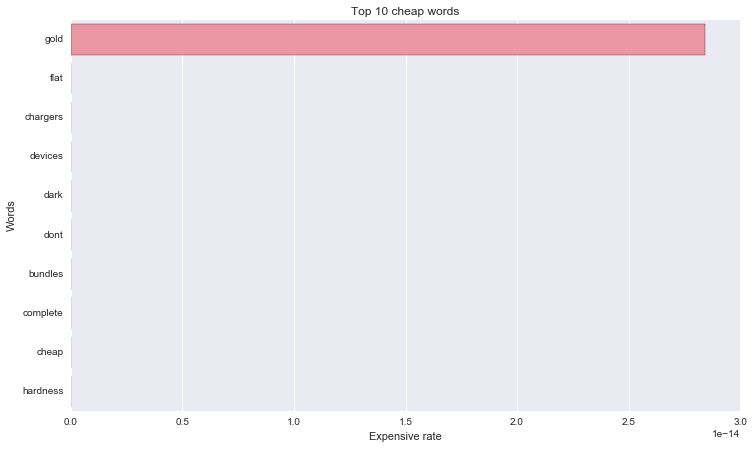

In [316]:
plt.figure(figsize=(12,7))
ax = sns.barplot(y=bad_words, x=(1 - np.exp(bad_prob)))
plt.title('Top 10 cheap words')
plt.xlabel('Expensive rate')
plt.ylabel('Words')

In [317]:
test[test['item_description'].apply(lambda x: 'complete' in x)]

,train_id,name,item_condition_id,brand_name,price,shipping,item_description,logprice,category1,category2,category3,rate
233,233,rockstar bundle xbox one,1,Xbox,38.0,1,brand new factory sealed fast free shipping p...,3.663562,electronics,video games consoles,games,1
829,829,resident evil nintendo gamecube,2,Nintendo,13.0,1,complete excellent overall condition,2.639057,electronics,video games consoles,games,0
1012,1012,free shipping,3,missing,7.0,1,call wild complete series,2.079442,electronics,media,dvd,0
1244,1244,greys anatomy complete seasons,1,missing,104.0,1,greys anatomy seasons new box dvd lot movie l...,4.653960,electronics,media,dvd,1
3202,3202,complete nintendo nes games,3,Nintendo,46.0,1,games complete come box manual game carts min...,3.850148,electronics,video games consoles,games,1
4955,4955,playstation ps final fantasy viii,3,missing,19.0,0,complete book played several years worked perf...,2.995732,electronics,video games consoles,games,1
5159,5159,lifeproof iphone case,2,missing,21.0,0,blueteal iphone lifeproof case flaws used may...,3.091042,electronics,cell phones accessories,cases covers skins,1
5182,5182,season three dvd boxed set,3,missing,11.0,0,complete season three disc set box fair condit...,2.484907,electronics,media,dvd,0
5689,5689,samsung gear,1,Samsung,170.0,1,brand samsung color dark grey dust water resis...,5.141664,electronics,cell phones accessories,cell phone accessories,1
6364,6364,metal gear solid ps,2,Sony,22.0,0,metal gear solid sons liberty mgs snake eate...,3.135494,electronics,video games consoles,games,1


In [318]:
test[test['item_description'].apply(lambda x: 'cheap' in x)]

,train_id,name,item_condition_id,brand_name,price,shipping,item_description,logprice,category1,category2,category3,rate
1299,1299,nike rare samsung galaxy edge case,1,missing,16.0,0,brand new high quality durable case unlike c...,2.833213,electronics,cell phones accessories,cases covers skins,0
1649,1649,nike new york iphone plus rubber case,1,missing,14.0,1,brand new high quality durable case unlike c...,2.708050,electronics,cell phones accessories,cases covers skins,0
1820,1820,razer epic wireless naga mouse,4,Razer,25.0,1,sold ️ figure turns randomly got super cheap e...,3.258097,electronics,computers tablets,components parts,1
2228,2228,apple original charger earpods new,1,Apple,18.0,1,brand new original apple headphones w remote m...,2.944439,electronics,cell phones accessories,cell phone accessories,0
2708,2708,xboxone ps,1,Sony,10.0,1,hour shipping top quality skin vinyl cheap pap...,2.397895,electronics,video games consoles,accessories,0
3342,3342,adidas iphone plus plus case,1,missing,16.0,0,brand new high quality durable case unlike c...,2.833213,electronics,cell phones accessories,cases covers skins,0
3500,3500,iphone plus screen protector glass,1,Apple,8.0,1,•tempered glass screen protector privacy• avai...,2.197225,electronics,cell phones accessories,screen protectors,0
3683,3683,xbox one,2,Xbox,189.0,0,black xbox one used cords accounted forsee pic...,5.247024,electronics,video games consoles,consoles,1
4065,4065,supreme weed iphone se rubber case,1,missing,16.0,0,brand new high quality durable case unlike c...,2.833213,electronics,cell phones accessories,cases covers skins,0
4653,4653,wireless keyboard mouse combo,2,missing,21.0,0,selling combo cheaper price includes wireless ...,3.091042,electronics,computers tablets,components parts,1


In [319]:
test[test['item_description'].apply(lambda x: 'hardness' in x)]

,train_id,name,item_condition_id,brand_name,price,shipping,item_description,logprice,category1,category2,category3,rate
2505,2505,tempered glass iphone,1,Apple,6.0,1,screen protector made specially processed glas...,1.945910,electronics,cell phones accessories,screen protectors,0
3500,3500,iphone plus screen protector glass,1,Apple,8.0,1,•tempered glass screen protector privacy• avai...,2.197225,electronics,cell phones accessories,screen protectors,0
4221,4221,iphone tempered glass,1,missing,5.0,1,tempered glass features item made protect lcd...,1.791759,electronics,cell phones accessories,screen protectors,0
4497,4497,blush pink case iphone plus models,1,missing,8.0,1,ultrthin mm surface never saw full body case t...,2.197225,electronics,cell phones accessories,cases covers skins,0
6992,6992,iphone metal infused tempered glass fs,1,missing,10.0,1,free shipping latest iphones ranging iphone i...,2.397895,electronics,cell phones accessories,screen protectors,0
9025,9025,iphone tempered glass screen protector,1,missing,5.0,1,h hardness real glass includes tempered glass...,1.791759,electronics,cell phones accessories,screen protectors,0
11228,11228,x iphone plus screen protector,1,Apple,8.0,1,•tempered glass screen protector • compatible ...,2.197225,electronics,cell phones accessories,screen protectors,0
11749,11749,iphone tempered glass screen prot,1,missing,10.0,1,• iphone tempered glass protector • h hardnes...,2.397895,electronics,cell phones accessories,screen protectors,0
